In [11]:
import array
import os
import sys
import numpy as np
import math 
from PIL import Image


class DWT:
    def __init__(self):
        #self.real_image=None
        self.levels=0
        self.height=0
        self.width=0

        
        
      
    def Imagebase2(self,arr):
        '''
        If the image doesn't have length of its height or width in power of 2s, then 
        this Module can help to convert image height and width into power of 2s
        '''
        
        height=arr.shape[0] #height of the given array
        width=arr.shape[1] #width of the given array
        
        
        new_height = 2**int(math.log2(height)) # largest power of 2 less than or equal to the height
        new_width = 2**int(math.log2(width)) # largest power of 2 less than or equal to the width
        
        self.height = new_height
        self.width = new_width
        return arr[0:new_height, 0:new_width]
            
        
        
    def ppm_togrey(self,arr):
            ''' Module for converting 3-D ppm image array into 2-D image array after applying lumnionsity method'''
            
            height=arr.shape[0] #height of the input array
            width=arr.shape[1] #width of the input array
            
            #Defining a 2-D pgm_buffer array to hold  weighted  sum RGB channels of the input array 
            pgm_buffer = np.zeros((height, width),dtype=np.float16)
            
            #Applying luminosity method on the copied array
            index=0
            for i in range(height):
                    for j in range(width):
                        
                        #---------------------for ppm 3-D array---------------------------------
                        for_red_channel  =  arr[i][j][0]*0.21 
                        
                        for_green_channel =  arr[i][j][1]*0.71
                        
                        for_blue_channel  =  arr[i][j][2]*0.07
                        
                        #adding all modified values of RGB channels
                        lumionsity_val= int(for_red_channel + for_green_channel + for_blue_channel)
                
                        
                        
                        #---------------------for pgm 2-D array-----------------------------------
                        
                        pgm_buffer[i][j]=(lumionsity_val)
                    
                        
            #returning the 2-D pgm array
            return pgm_buffer
    
        
        
        
    def ppm_read(self,file):
            #Importing ppm image file using PIL module 
            real_image=Image.open(file)
            
            #Converting ppm image file into 3-D array using numpy module
            real_image_arr=np.asarray(real_image,dtype=np.float16)
            #self.real_arr=real_image_arr.copy()
            
            #getting the height and width of the ppm image
            shape = real_image_arr.shape
            return real_image_arr

    def pgm_dwt2D(self,data,height,width,levels):
        '''
        Module for applying DWT tranform, Haar transform in particular on the image array on the given levels, Recursively
        '''
        
        #-----------Base case----------------------------------------------
        if levels<0:
            #if levels reaches less than 0, it returns the input array
            return data
        
        
        #-----------Recursive case------------------------------------------
        else:
            
            buffer= data.copy() #copying given image data to a buffer
            #self.levHeight= height 
           # self.levWidth= width
            
            new_y= 0 #to save new height for passsing it in the  rescursive function 
            new_x= 0 #to save new width for passing it in the recursive function
            
            #Moving row-wise and applying Haar transform on the rows one by one in the 2-D image array
            for y in range(height):
                    point=0
                    for x in range(0,width,2):
                        buffer[y][point] = (data[y][x] + data[y][x+1])/2
                        point+=1
                        
                    new_x=point
                    
                    for x in range(0,width,2):
                        buffer[y][point]= (data[y][x] - data[y][x+1])/2
                        point+=1
            
            result=buffer.copy() #copying the array obtained after applying row-wise Haar transform
            
            #Moving column-wise and applying Haar transform on the columns one by one 
            #in the 2-D row-wise haar transformed array
            
            for x in range(width):
                    point=0
                    for y in range(0,height,2):
                        result[point][x] = (buffer[y][x] + buffer[y+1][x])/2
                        point+=1
                        
                    new_y=point
                    
                    for y in range(0,height,2):
                        result[point][x]= (buffer[y][x] - buffer[y+1][x])/2
                        point+=1
                        
                        
            #replacing the input image array with row and column haar transformed 2-D array
            for i in range(height):
                for j in range(width):
                    data[i][j]=result[i][j]
            
            
            #width= width//2
           # height= height//2
            levels-=1
            
            
            #This process this performed recursively till the levels values reaches less than 0
            result=self.pgm_dwt2D(data,new_y,new_x,levels)
                        


            return data
                        
    def pgm_Idwt2D(self,data,height,width,levels,invlevels):
        '''
        Module for applying IDWT tranform, Haar transform in particular on the image array on the given inverse levels, Recursively

        '''
        #-------------if invlevels data invalid, it returns the input 2-D image data---------------
        if invlevels==None:
            return data
        
        #-----------base cases-----------------------------------
        
        #if 
        if levels<=0 and invlevels>=0:
            new_y= 0
            new_x= 0
            
            #for copying the input image 2-d array to perform inverse Haar transform operations
            buffer=data.copy()   
            
            #for inverse Haar column wise operations
            for x in range(width):
                    point=0
                    invheight= height//2
                    
                    new_y=0
                    
                    for y in range(0,invheight):
                        buffer[new_y][x] = data[y][x] 
                        buffer[new_y+1][x]= data[y][x] 
                        new_y+=2
                    
                    new_y=0
                        
                                        
                    for y in range(invheight,height):
                        buffer[new_y][x] += data[y][x] 
                        buffer[new_y+1][x]-= data[y][x] 
                        new_y+=2
            
            
            #for copying the Haar transformed column wise transformed 2-D image array 
            result= buffer.copy()
            
                        
            #Applying the Haar row wise transformation on the input Haar transformed column-wise image array
            for y in range(height):                    
                    new_x=0
                    invwidth= width//2

                    for x in range(0,invwidth):
                        result[y][new_x] = buffer[y][x]
                        result[y][new_x+1] = buffer[y][x]
                        new_x+=2
                        
                    new_x=0
                    
                    for x in range(invwidth,width):
                        result[y][new_x]+= buffer[y][x] 
                        result[y][new_x+1]-= buffer[y][x] 
                        new_x+=2
            
            #Copying inverse Haar transformed array to the input 2-D image array
            for i in range(height):
                for j in range(width):
                    data[i][j]=result[i][j]
            
            #Recursively upsampling the input image data till invlevels reaches less than 0
            result=self.pgm_Idwt2D(data,height<<1,width<<1,levels,invlevels-1)   
            
            return data
        
        #if the levels and inverse levels both are less than 0, it returns the input 2-D image array
        if levels<0 and invlevels<0:
            return data
        #----------------------Recusive Case till the input image height and width reaches less then 0-------------
        
        #In order to bring the image back to its original state, operations should start from image state, till where the DWT
        #is already been performed
        
        else:
            
            data=self.pgm_Idwt2D(data,height//2,width//2,levels-1,invlevels) 
        return data
            
    def pgm_normalize(self, image_array):
            '''
            pgm_normalize module reads the 2-D array and scale the values of the given array between 0-255
            and returns the array in 8 bit unsigned integer type
            '''
            old_max=image_array.max() #maximum value in input array
            old_min=image_array.min() #minimum value in input array
            old_range=old_max - old_min #range of values of input array

            new_min=0.0 #target minimum
            new_max=255.0 #target maximum
            new_range=new_max - new_min # target range
            

            for i in range(self.height):
                    for j in range(self.width):
                            old_val= image_array[i][j]
                            scale=(old_val-old_min)/old_range
                            
                            new_val=(new_range*scale)+new_min
                            image_array[i][j]= new_val #converting the scaled value between 0.0 and 255.0 into integer type
                            
            return image_array         

    
            
    def pgm_write(self,arr,name):
            
            #creating an output file for pgm greyscale image
                        
            
            #opening the output file in Output directory 
            #os.getcwd() returns current working directory, this program would work for linux and macos 
            #as /Output/ has forward slash and windows operating system uses backward slash
            file= os.getcwd()+'/Output/'+name
            
            #opening the output file
            fout_pgm=open(file,'wb')
            
            # define PGM Header with magic number P5
            pgmHeader = 'P5' + '\n' + str(self.width) + '  ' + str(self.height) + '  ' + str(255) + '\n'
            #encode() for converting pgmheader from 'string' type to 'byte', and writing it in the output file
            fout_pgm.write(pgmHeader.encode())
            
            arr=arr.astype(np.uint8)
            arr.tofile(fout_pgm)
            
            fout_pgm.close()
            
    def pgm_free(self):
        ''' pgm_free module for deleting all output files, not the memory occupied for arrays,
            as python has garbage collector
        '''
        try:
            os.remove('Output/dgrey.pgm')

        except:
            print('dgrey.pgm does not exist!')
            
        try:
            os.remove('Output/ngrey.pgm')

        except:
            print('ngrey.pgm does not exist!')
            
        try:
            os.remove('Output/grey.pgm')
        except:
            print('grey.pgm does not exist!')

        
            

if __name__=='__main__':
    #assigning file location to file
    file='Images/Grey_lena.ppm'


    
    #creating a DWT() object to operate all image operations using it
    new_obj=DWT()
    
    #allocate image of given size, returns 3-D array representation of ppm file 
    cimg = new_obj.ppm_read(file)
    
    #Converting 3-D ppm colored image to 2-D pgm grey scale image
    gimg = new_obj.ppm_togrey(cimg)

    #Converting length of image height and width into powers of 2s
    gimg = new_obj.Imagebase2(gimg)
    
    
    #input levels for DWT and inverse levels for IDWT

    while True:
      try:
        print('Provide levels for Haar Wavelet transform:')
        levels=int(input())
        if type(levels)==int:
            break
      except:
        continue
    
    print('\n')
    while True:
      try:
        print('Inverse levels are less than or equal to levels provided for DWT, including 0 to levels\n')
        print('Provide levels for inverse Haar Wavelet transform, otherwise inverse level would assumed to be equal to value of levels:')        
        invlevels=int(input())
        if type(levels)==int and 0<=invlevels<=levels :
            break
      except:
        print('Inverse levels is assumed: ',levels)
        invlevels= levels
        break
    
    #Downsampling input 2-D pgm array using DWT transformation, Haar wavelet transform in particular
    gimg = new_obj.pgm_dwt2D(gimg,new_obj.height,new_obj.width,levels)
    new_obj.pgm_write(gimg,"dgrey.pgm")
    
    #Normalizing 2-D pgm array that is obtained by DWT transformation
    nimg=gimg.copy()
    nimg=new_obj.pgm_normalize(nimg)
    new_obj.pgm_write(nimg,"ngrey.pgm")

    
    #Upsampling input 2-D pgm array using Inverse DWT transformation, Haar wavelet transform in particular
    gimg = new_obj.pgm_Idwt2D(gimg,new_obj.height,new_obj.width,levels,invlevels)
    new_obj.pgm_write(gimg,"grey.pgm")



            
            

        

Provide levels for Haar Wavelet transform:


 3




Inverse levels are less than or equal to levels provided for DWT, including 0 to levels

Provide levels for inverse Haar Wavelet transform, otherwise inverse level would assumed to be equal to value of levels:


Inverse levels is assumed:  3


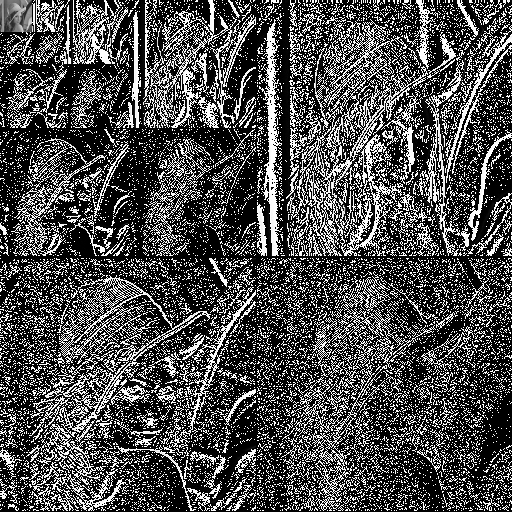

In [14]:
from PIL import Image
Image.open('Output/dgrey.pgm')

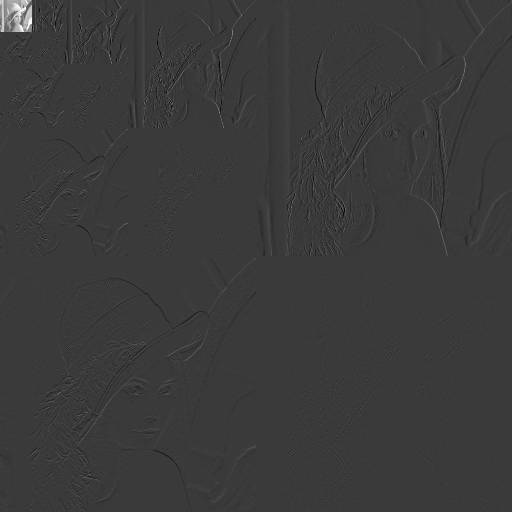

In [13]:
Image.open('Output/ngrey.pgm')

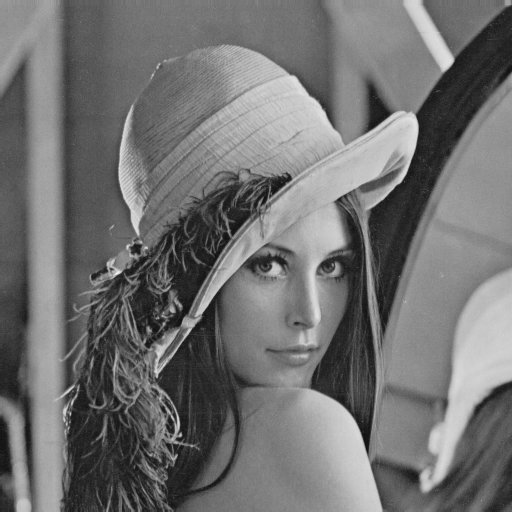

In [12]:
Image.open('Output/grey.pgm')